In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

import btrdb
from btrdb.utils.timez import ns_delta, ns_to_datetime, to_nanoseconds

import yaml

In [2]:
with open('../config.yaml', 'r') as f:
    config = yaml.safe_load(f)
    
#Establishing the connecting to the server
db = btrdb.connect(config['connection']['api_url'], apikey=config['connection']['api_key'])


In [3]:
streams = db.streams_in_collection('events/switching_A')

In [6]:
streams_table = pd.DataFrame(columns=['Collection','Name','Units','UUID'])
for ix, stream in enumerate(streams):
    tags = stream.tags()
    streams_table.loc[ix] = [stream.collection, stream.name, tags['unit'], stream.uuid]

streams_table.head(n=10)

,Collection,Name,Units,UUID
0,events/switching_A/StationB_Line2,Ph1_Vmag,volts,e2fa9ec2-9b10-438a-be71-5b075ed58bfe
1,events/switching_A/StationB_Line2,Ph2_Vmag,volts,aea35365-abda-4b31-80a8-f8de7ca4ab9e
2,events/switching_A/StationB_Line2,Ph1_Vang,deg,df5c20f6-a938-4c61-b578-480ef662e46e
3,events/switching_A/StationB_Line2,Ph2_Vang,deg,cf593310-7b72-4570-b13a-03a6eed6c502
4,events/switching_A/StationB_Line2,Ph3_Vang,deg,c53435b2-b280-448d-b6b5-f5ec12b90e50
5,events/switching_A/StationB_Line2,pos_Iang,deg,ea4ffd39-7b31-4f7d-a8de-c099b14cf949
6,events/switching_A/StationB_Line2,Ph1_Iang,deg,a5b1b51c-10c4-429a-bcb3-01a30360625d
7,events/switching_A/StationB_Line2,Ph2_Iang,deg,a1b84660-cf1f-4f33-a608-14ae2e105620
8,events/switching_A/StationB_Line2,Ph3_Iang,deg,cf5e57ca-894c-4500-ac4d-ee062f94ac20
9,events/switching_A/StationG_Line4,frequency,Hz,5c0f51e7-5d24-4319-b79d-62d5ae9cc924


In [7]:
idx = streams_table['Name'] == 'Ph1_Vmag'
streamset = db.streams(*streams_table[idx]['UUID'].tolist())
start = streams[0].earliest()[0].time
end = streams[0].latest()[0].time
magnitudes = streamset.filter(start=start, end=end).to_dataframe()

In [8]:
magnitudes.head()

,events/switching_A/StationB_Line2/Ph1_Vmag,events/switching_A/StationB_Line3/Ph1_Vmag,events/switching_A/StationG_Line4/Ph1_Vmag,events/switching_A/StationD_Line2/Ph1_Vmag,events/switching_A/StationA_Line4/Ph1_Vmag,events/switching_A/StationF_Line1/Ph1_Vmag,events/switching_A/StationA_Line5/Ph1_Vmag,events/switching_A/StationD_Line3/Ph1_Vmag,events/switching_A/StationC_Line1/Ph1_Vmag,events/switching_A/StationB_Line1/Ph1_Vmag,...,events/switching_A/StationG_Line2/Ph1_Vmag,events/switching_A/StationB_Line4/Ph1_Vmag,events/switching_A/StationA_Line1/Ph1_Vmag,events/switching_A/StationE_Line1/Ph1_Vmag,events/switching_A/StationA_Line2/Ph1_Vmag,events/switching_A/StationI_Line1/Ph1_Vmag,events/switching_A/StationD_Line1/Ph1_Vmag,events/switching_A/StationE_Line2/Ph1_Vmag,events/switching_A/StationI_Line2/Ph1_Vmag,events/switching_A/StationH_Line1/Ph1_Vmag
time,,,,,,,,,,,,,,,,,,,,,
1577836800000000000,200825.5469,200825.5469,205673.8906,204653.4063,200670.2344,205194.4375,200670.2344,204653.4063,205672.7500,200825.5469,...,205427.8594,200825.5469,200670.2344,204280.5938,200670.2344,81716.6641,204653.4063,204280.5938,80239.1953,206001.1719
1577836800033332992,200824.0938,200824.0938,205678.5781,204659.6875,200669.9219,205210.6094,200669.9219,204659.6875,205670.5000,200824.0938,...,205423.8125,200824.0938,200669.9219,204274.2656,200669.9219,81718.8359,204659.6875,204274.2656,80233.5156,205996.6563
1577836800066667008,200799.7969,200799.7969,205681.5781,204653.4063,200635.1719,205211.9688,200635.1719,204653.4063,205673.6250,200799.7969,...,205428.0625,200799.7969,200635.1719,204274.2656,200635.1719,81725.0469,204653.4063,204274.2656,80241.4141,205995.4688
1577836800100000000,200795.5000,200795.5000,205681.3438,204640.8281,200641.2344,205206.9063,200641.2344,204640.8281,205675.8750,200795.5000,...,205438.6094,200795.5000,200641.2344,204267.9531,200641.2344,81726.3750,204640.8281,204267.9531,80248.0938,205992.0625
1577836800133332992,200806.5938,200806.5938,205688.5156,204647.1094,200647.2813,205208.0469,200647.2813,204647.1094,205675.8438,200806.5938,...,205446.5000,200806.5938,200647.2813,204267.9531,200647.2813,81735.1328,204647.1094,204267.9531,80253.4766,205987.2969


In [9]:
idx = streams_table['Name'] == 'Ph1_Vang'
streamset = db.streams(*streams_table[idx]['UUID'].tolist())
start = streams[0].earliest()[0].time
end = streams[0].latest()[0].time
angles = streamset.filter(start=start, end=end).to_dataframe()


In [10]:
magnitudes = magnitudes.rename(columns=dict([(key, key.split('/')[-2]) for key in magnitudes.keys()]))
angles = angles.rename(columns=dict([(key, key.split('/')[-2]) for key in angles.keys()]))

<AxesSubplot:xlabel='time'>

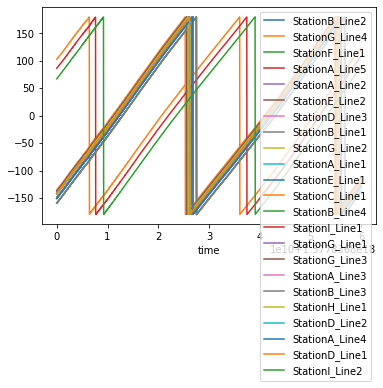

In [11]:
angles.plot()

## Observations

We see the phase angles follow a sawtooth pattern. This is because they're reported to be between -180 and 180 degrees. It's important to note that the discontinuity is not a meaningful transition in the data, as phase angles of 0 degrees and 360 degrees are mathematically the same.

# Unwrapping phase angles

Here, we'll "unwrap" the phase angles to remove the discontinuity, and will set a reference point in the system (here `StationB_Line2`) which all other phase angles will be reported in reference to.

In [54]:
ref = angles.keys()[0]
print(ref)

StationB_Line2


In [57]:
offset = angles.diff()
unwrapped = angles.copy()
for key in angles.keys():
    idx = offset[key] < -359
    for ix in offset[idx].index:
        unwrapped[key].loc[ix:] = unwrapped[key].loc[ix:] + 360.

referenced = unwrapped.copy().subtract(unwrapped[ref], axis=0)

<AxesSubplot:xlabel='time'>

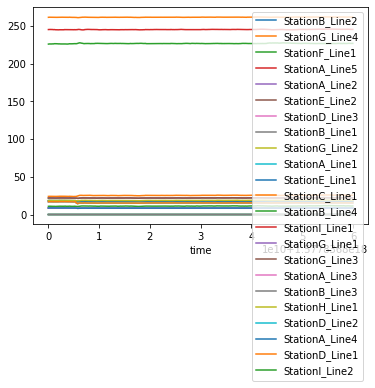

In [58]:
referenced.plot()

In [59]:
idx = referenced.mean() > 200
print(referenced.mean()[idx].index)

Index(['StationG_Line4', 'StationI_Line1', 'StationI_Line2'], dtype='object')


## Observations

Phase angle differences no longer exhibit the same discontinuity as before. We note that three of the measurement nodes have much larger phase angle differences (relative to the reference) than other measurement sites. This difference suggests that these sites are electrically distant from the others.

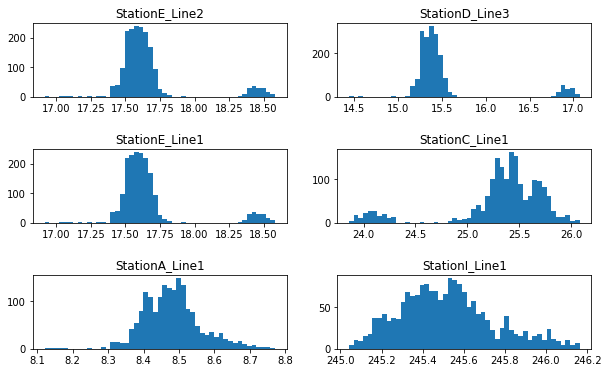

In [51]:
stations = ['StationE_Line2','StationD_Line3','StationE_Line1','StationC_Line1','StationA_Line1','StationI_Line1']
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,6))

for i, _ax in enumerate(ax.flatten()):
    station = stations[i]
    
    bins = np.linspace(referenced[station].min(), referenced[station].max(), 50)
    _ax.hist(referenced[station].tolist(), bins=bins)
    _ax.set_title(station)
    
fig.subplots_adjust(wspace=0.2, hspace=0.7)
plt.show()

## Observations

The histogram of phase angles at each measurement site clearly shows that certain sites follow a bimodal distribution, while others do not. This would suggest that phase angle differences in some parts of the network are affected by the switching event, while other nodes are unaffected.

# Phase angle clustering

Here, we'll use gaussian mixture models to cluster phase angle measurements at each site into one of two clusters. We'll also check for time-dependence to confirm the hypothesis that the cluster conforms to "before" and "after" the switching event.

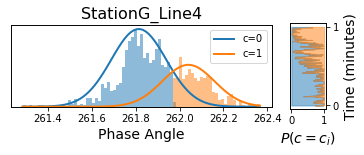

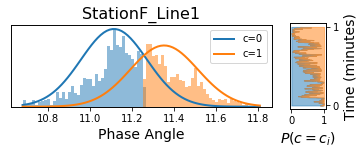

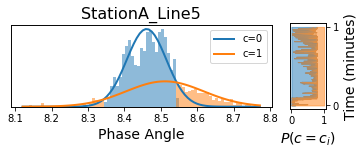

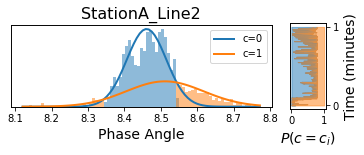

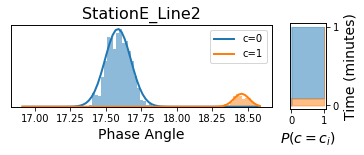

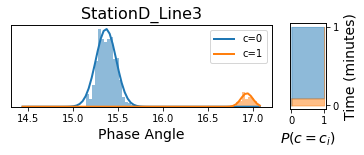

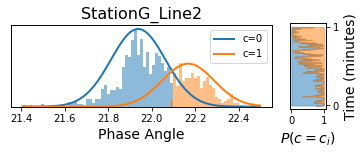

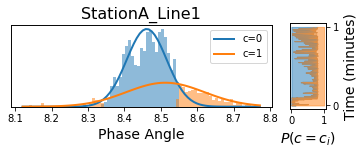

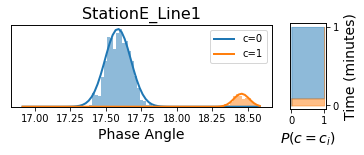

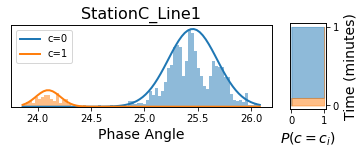

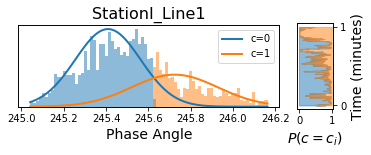

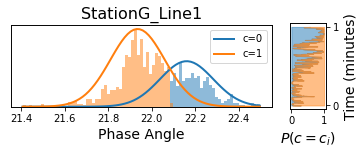

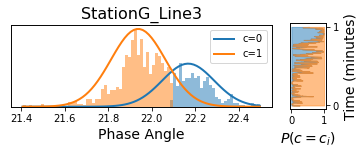

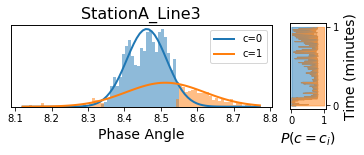

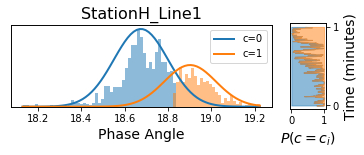

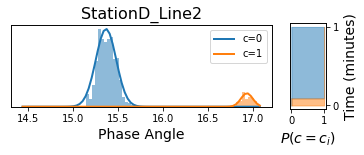

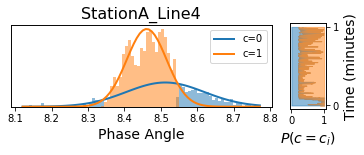

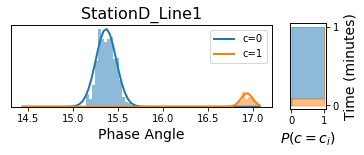

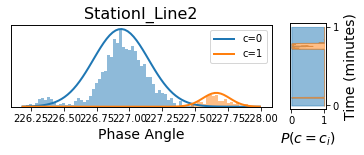

In [191]:
from sklearn import mixture
from scipy import stats
import seaborn as sns

def fit_gmm(data):
    X = np.array(data).reshape((len(data),1))
    return mixture.GaussianMixture(n_components=2).fit(X)
    
def get_pdfs(gmm, bins=bins):
    pdfs = []
    for i in range(gmm.n_components):
        mean = gmm.means_[i,0]
        std = np.sqrt(gmm.covariances_[i,0,0])
        wt = gmm.weights_[i,]
        
        rv = stats.norm(mean, std)
        pdfs.append(wt*rv.pdf(bins))
    return pdfs

def get_clusters(data, gmm):
    X = np.array(data).reshape((len(data),1))
    return gmm.predict(X), gmm.predict_proba(X)
    

transition_points = []
for s in referenced.keys():
    data = referenced[s]
    if sum(data) == 0:
        continue
    gmm = fit_gmm(data)
    bins = np.linspace(min(data), max(data), 80)
    
    pdfs = get_pdfs(gmm, bins=bins)
    clusters, probs = get_clusters(data, gmm)
    
    colors = sns.color_palette()
    fig, ax = plt.subplots(figsize=(5,1.5))
    fig.subplots_adjust(right=0.85)
#     ax.set_position([.1,.1,0.6,0.9])
    ax.set_title(s, fontsize=16)
    ax.set_xlabel('Phase Angle', fontsize=14)

    ax2 = ax.twinx()
#     ax2.set_position([.1,.1,0.6,0.9])
    for i in range(gmm.n_components):
        ax.hist(data[clusters==i], bins=bins, color=colors[i], alpha=0.5)
        ax2.plot(bins, pdfs[i], lw=2, color=colors[i], label='c=%i'%(i))
    ax2.legend()
        
    ax.set_yticks([])
    
    ax2.set_ylim((0, ax2.get_ylim()[1]))
    ax2.set_yticks([])
    
    
    ax = fig.add_subplot(111)
    ax.set_position([0.9,0.1,0.1,0.8])
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel(r'$P(c=c_i)$', fontsize=14)
    
    _ax = ax.twinx()
    _ax.set_position([0.9,0.1,0.1,0.8])
    
    for i in range(gmm.n_components):
        if i == 0:
            _ax.fill_betweenx(data.index, np.zeros(data.shape), probs[:,i],
                          color=colors[i], alpha=0.5, label='c=0')
        elif i == 1:
            _ax.fill_betweenx(data.index, 1-probs[:,i], np.ones(data.shape),
                          color=colors[i], alpha=0.5, label='c=1')
            
            
    _ax.set_yticks([data.index.min(), data.index.max()])
    _ax.set_yticklabels([0,1])
    _ax.set_xticks([0,1])
    low = _ax.get_ylim()[0]
    _ax.set_ylabel('Time (minutes)', fontsize=14)
    plt.show()

## Observations

At some of the stations, we see phase angles clearly separate into one of two clusters. Furthermore, we note that there is clear time structure to the clustering. The graph on the right shows probabilistic cluster assignments (x-axis) at each time step in the data (y-axis). For many of the nodes, there is very obviously a transition point where the phase angle transitions, first centering around one value and then centering around another.

At other nodes, there is much less separation between nodes and it is unclear whether or not there is any kind of time structure to cluster assignments.